In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Increasing numNodes

In [47]:
path = "../results/numNodes"
files = sorted(os.listdir(path))
#files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and "out" in i]

In [54]:
df_time = pd.DataFrame()
df_prec = pd.DataFrame()
df_conv = pd.DataFrame()

for file in files:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            df_time.loc[row,col] = float(vals[3])
            df_prec.loc[row,col] = int(vals[4])
            df_conv.loc[row,col] = int(vals[5])==1


In [55]:
df_time

,0,1,2,3
"10,10000,5000",0.457218,0.458371,0.470197,0.458436
"50,10000,5000",1.626825,1.632320,1.625543,1.617006
"100,10000,5000",2.891204,2.886272,3.052649,3.077069


In [56]:
df_prec

,0,1,2,3
"10,10000,5000",269.0,269.0,269.0,269.0
"50,10000,5000",807.0,798.0,807.0,807.0
"100,10000,5000",1985.0,1985.0,1817.0,1945.0


In [57]:
df_conv

,0,1,2,3
"10,10000,5000",True,True,True,True
"50,10000,5000",True,True,True,True
"100,10000,5000",True,False,True,True


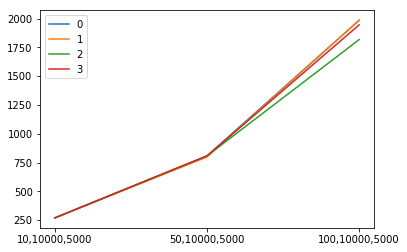

In [58]:
plt.plot(df_prec);
plt.legend(df.columns);